# **TP - Grupo 4**
Pedro Paulo Costa Pereira - A88062

Tiago André Oliveira Leite - A91693

# **Problema 1 - Sistema de Tráfego**

In [184]:
import networkx as nx
from ortools.linear_solver import pywraplp
import random
import numpy
from functools import reduce

In [140]:
def graph_generator():
    G = nx.DiGraph()

    nodes = [v for v in range(1,33)]
    G.add_nodes_from(nodes)
    random.shuffle(nodes)

    for i in range(len(nodes)-1):
        G.add_edge(nodes[i], nodes[i+1])
    G.add_edge(nodes[len(nodes)-1],nodes[0])

    for n in nodes:
        candidates = [v for v in nodes if v != n]
        random.shuffle(candidates)
        num_adj = random.randint(1,2)
        for i in range(num_adj):
            G.add_edge(n, candidates[i])
    return G

True

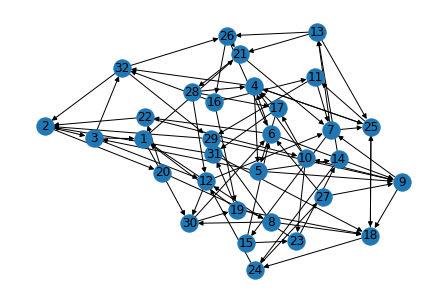

In [28]:
G = graph_generator()
nx.draw(G, with_labels = True)
nx.is_strongly_connected(G)

In [247]:
def sub_graph_generator(G):
    solver = pywraplp.Solver.CreateSolver('SCIP')
    
    adj = {}
    for edge in G.edges():
        adj[edge] = solver.BoolVar('%i%i' %edge)
    
    for s in G.nodes():
        print(s)
        for d in G.nodes():
            if d != s:
                paths = nx.all_simple_edge_paths(G, s, d)
                solver.Add(sum([numpy.prod([adj[(a,b)] for (a,b) in path]) for path in paths]) >= 1)
                
                
    